# Homework 1

In this homework, you are tasked to reproduce predictive trends of conduction velocity and electrical excitability in peripheral axons using biophysical simulations.

More specifically, you will try to reproduce trends reported in figure 8 of the [McIntyre et al. 2002](https://doi.org/10.1152/jn.00353.2001) paper, using the same model, stimulus and medium properties. 

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from constants import M_TO_CM
from axons import MyelinatedAxon
from medium import VolumeConductor
from stimulus import ExtracellularCurrentPulseTrain
from neuronsims import Simulation
from simutils import binary_search
from logger import logger

## Provided material

### Model components and configuration

Let's start by instantiating the different components of our system, and wrapping them up into a simulation object, called `sim`:

In [2]:
axon = MyelinatedAxon(
    diameter=10,  # um
    nnodes=51,
    pos=(100, 0, 50)
)
medium = VolumeConductor(
    sigma=0.56)
stim = ExtracellularCurrentPulseTrain(
    pos=(0., 0., -300.),  # um
    I=-30.,  # uA
    tpulse=.2,  # ms
    npulses = 2,
    PRF = 0.2,  # kHz
    tstart=2. # ms
)
sim = Simulation(
    axon, medium, stim)

 07/03/2022 11:24:09: created MyelinatedAxon(pos=[100, 0, 50]um, d=10.0um, 51 nodes, L=57.5mm) model
 07/03/2022 11:24:09: created IsotropicVolumeConductor(sigma=[0.560]S/m)
 07/03/2022 11:24:09: created ExtracellularCurrentPulseTrain(pos=[0, 0, -300]um, I=-30.00uA, tpulse=0.2ms, npulses=2, PRF=0.20kHz, tstart=2.0ms)


### Visualizing the simulation arrangement

You can check the geometrical arrangement of your simulation by calling the `sim.plot_config` method:

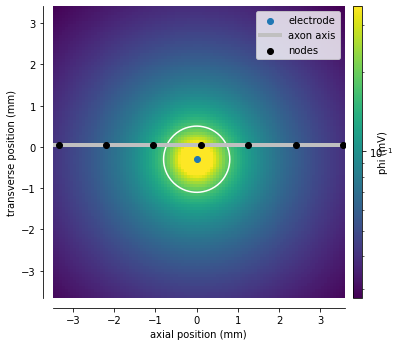

In [3]:
fig = sim.plot_config(zoomout=10)

### Accessing / modifying simulation parameters

You can also access and modify parameters of the different components of this simulations by simply accessing the corresponding simulation attributes.

Stimulus parameters can be accessed/modified through the `sim.stim` field:

In [4]:
print('original stimulus:', sim.stim)
sim.stim.tpulse = 0.1  # pulse duration (ms) 
sim.stim.I = -20. # pulse amplitude (uA)
sim.stim.pos = (0, 0, 100) # (x, y, z) electrode position (um)
sim.stim.npulses = 1  # number of pulses
print('modified stimulus:', sim.stim)

original stimulus: ExtracellularCurrentPulseTrain(pos=[0, 0, -300]um, I=-30.00uA, tpulse=0.2ms, npulses=2, PRF=0.20kHz, tstart=2.0ms)
modified stimulus: ExtracellularCurrentPulseTrain(pos=[0, 0, 100]um, I=-20.00uA, tpulse=0.1ms, npulses=1, PRF=0.20kHz, tstart=2.0ms)


Axon parameters can be accessed/modified through the `sim.axon` field:

In [5]:
print('original axon:', sim.axon)
sim.axon.diameter = 10.  # axon diameter (um)
sim.axon.pos = (0, 0, 0)  # (x, y, z) position of the axon center node (um)
print('modified axon:', sim.axon)

original axon: MyelinatedAxon(pos=[100, 0, 50]um, d=10.0um, 51 nodes, L=57.5mm)
modified axon: MyelinatedAxon(pos=[0, 0, 0]um, d=10.0um, 51 nodes, L=57.5mm)


Medium parameters can be accessed/modified through the `sim.medium` field.

For instance, here we set an anisotropic $(x, y, z)$ conductivity tensor matching the values depicted in the McIntyre paper (longitudinal resistivity 300 Ω.cm; transverse resistivity 1200 Ω.cm).

In [6]:
print('original medium:', sim.medium)
sigma_longitudinal = 1 / 300 * M_TO_CM  # S/m  
sigma_transverse = 1 / 1200 * M_TO_CM  # S/m
sim.medium.sigma = (sigma_longitudinal, sigma_transverse, sigma_transverse)
print('modified medium:', sim.medium)

original medium: IsotropicVolumeConductor(sigma=[0.560]S/m)
modified medium: AnisotropicVolumeConductor(sigma=[0.333, 0.083, 0.083]S/m)


Let's check the simulation configuration after these modifications:

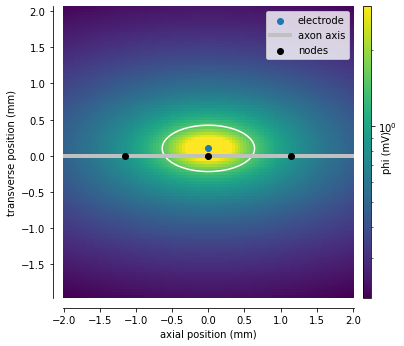

In [7]:
fig = sim.plot_config(contour=True, zoomout=20)

### Simulation and spike detection

Once your simulation is set up, you can run it by calling the `sim.run` method, which will output the resulting time vector and (node x time) voltage array:

In [8]:
tvec, vnodes = sim.run()
print(f'tvec = {tvec.shape} samples vector')
print(f'vnodes = {vnodes.shape} samples array')

 07/03/2022 11:24:10: simulating MyelinatedAxon(pos=[0, 0, 0]um, d=10.0um, 51 nodes, L=57.5mm) stimulation by ExtracellularCurrentPulseTrain(pos=[0, 0, 100]um, I=-20.00uA, tpulse=0.1ms, npulses=1, PRF=0.20kHz, tstart=2.0ms)...
tvec = (1001,) samples vector
vnodes = (51, 1001) samples array


You can then visualize these results by calling the `sim.plot_results` method with `tvec` and `vnodes` as input parameters:

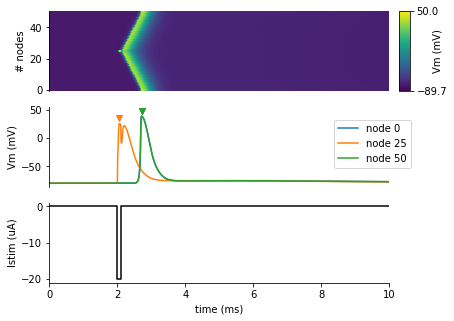

In [9]:
fig = sim.plot_results(tvec, vnodes, mark_spikes=True)

## Assigned tasks

### Task 1: compute conduction velocity as a function of axon diameter

In this task, you should reproduce the trend of conduction velocity as a function of axon diameter depicted in fig. 8A of the McIntyre paper.

To this end, you will need to:
- write a `conduction_velocity` function that computes axon conduction velocity from simulation results. *Hint: You can access the longitudinal coordinates of the axon nodes (in μm) with `sim.axon.xnodes`. You can can also make use of the provided `sim.detect_spikes` method. Type in `help(sim.detect_spikes)` to figure out how to use it.*
- use that function to compute conduction velocity over a relevant range of axon diameters
- plot the results on a graph

In [ ]:
# CHECK THE USAGE OF PROVIDED FUNCTIONS HERE USING THE "HELP" COMMAND

In [10]:
def conduction_velocity(tvec, vnodes):
    '''
    Compute the condiution velocity from the simulation results

    :param tvec: time vector (ms)
    :param vnodes: 2D array of membrane voltage (mV) of nodes and time
    :return: conduction velocity (m/s)
    '''
    # YOUR FUNCTION CODE GOES HERE

# YOUR CODE GOES HERE

### Task 2: compute a "typical" strength-duration curve

In this task, you should reproduce the trend of strength-duration curve depicted in fig. 8B of the McIntyre paper, **using a 10 μm axon diameter and an electrode placed 100 μm above the axon central node**.

To this end, you will need to:
- write a `check_excitation_at` function that runs a simulation with a with a specific cathodic stimulus current amplitude and determines whether the axon is excited, in a robust manner. *Hint: you can make use of the provided `sim.detect_spikes` method. Type in `help(sim.detect_spikes)` to figure out how to use it.*
- use that function to automatically compute excitation thresholds over a relevant range of pulse durations. *Hint: you can make use of the the provided `binary_search` function, type in `help(binary_search)` to figure out how to use it.* Notably, you will need to determine a reasonable search interval to being the searchp procedure. Be also mindful of the sign of the stimulation current with respect to the search interval (which should be *positive*).
- plot the results on a graph (as a function of multiples of rheobase current)

In [15]:
# CHECK THE USAGE OF PROVIDED FUNCTIONS HERE USING THE "HELP" COMMAND

In [14]:
def check_excitation_at(I):
    '''
    Run a simulation with a with a specific cathodic stimulus current amplitude
    and determine whether the axon is excited by a cathodic stimulus.
    
    :param I: cathodic current amplitude (uA)
    :return: True if excited, False if not
    '''
    # YOUR FUNCTION CODE GOES HERE

# YOUR CODE GOES HERE

### Task 3: compute a "typical" strength-distance curve

In this task, you should reproduce the trend of strength-distance curve depicted in fig. 8C of the McIntyre paper, **using a 10 μm axon diameter and a 100 μs long pulse**.

To this end, you will need to:
- use the `check_excitation_at` function written in the previous task to compute excitation thresholds over a relevant range of electrode-to-axon distances. Again, you can make use of the the provided `binary_search` function.
- plot the results on a graph

In [13]:
# YOUR CODE GOES HERE